In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data 
creditcard_df = pd.read_csv('marketing.csv') 
creditcard_df 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average -.0.9 
# Purchases average is $1000 
# one off purchase average is —$600 
# Average purchases frequency is around 0.5 
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low 
# Average credit limit ~4500 
# Percent of full payment is 15% 
# Average tenure is 11 years 

creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Let's see who made one off purchase of $40761! 
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25] 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!! 
# Never paid credit card in full 
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006] 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<AxesSubplot:>

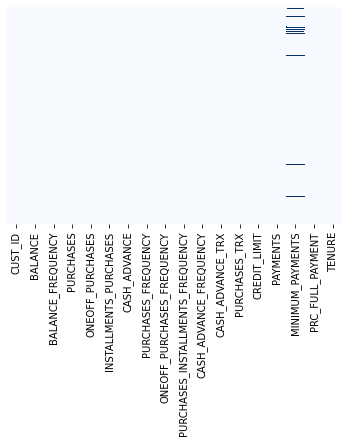

In [7]:
# Let's see if we have any missing data, luckily we don't! 
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues") 


In [8]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True),'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean() 


In [11]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

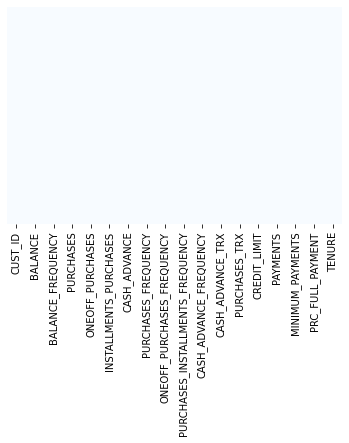

In [12]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues") 

In [13]:
# Let's see if we have duplicated entries in the data 
creditcard_df.duplicated().sum()

0

In [14]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True) 

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(creditcard_df.columns)
n

17

In [17]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

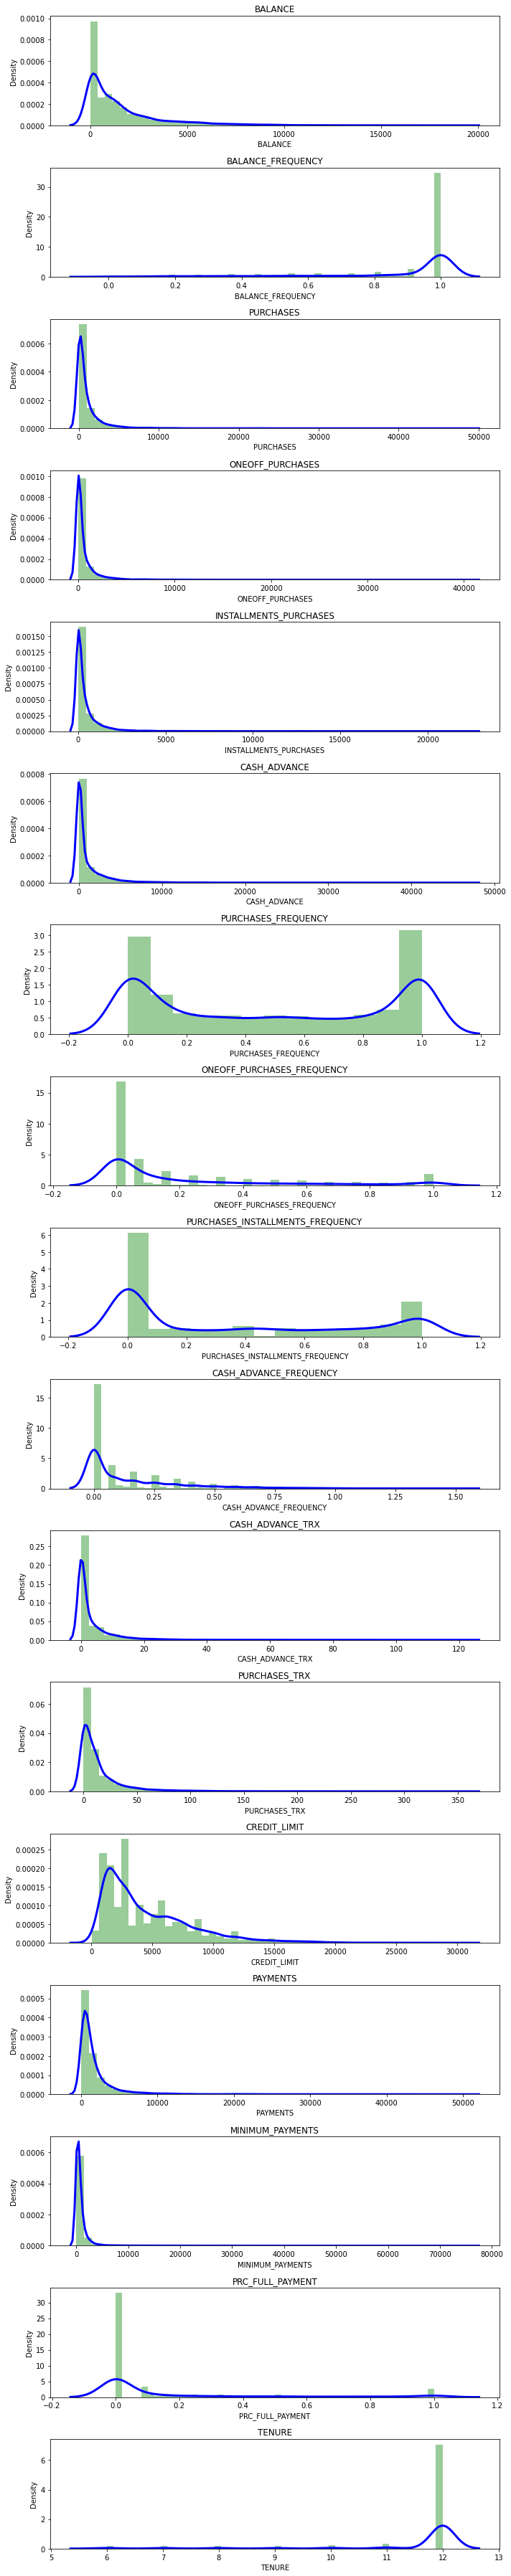

In [18]:
# distplot combines the matplotlib.hist function with seaborn kdeplot() 
# KDE Plot represents the Kernel Density Estimate 
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at ifferent values in a continuous variable. 

# Mean of balance is $1500 
# 'Balance_Frequency' for most customers is updated frequently ~1 
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers 
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT' ~0 
# Credit limit average is around $4500 
# Most customers are ~11 years tenure 

plt.figure(figsize=(10,50)) 
for i in range(len(creditcard_df.columns)): 
    plt.subplot(17, 1, i+1) 
    sns.distplot(creditcard_df[creditcard_df.columns[i]], 
                 kde_kws={"color": "b","lw": 3, "label": "KDE"}, 
                 hist_kws={"color": "g"}) 
    plt.title(creditcard_df.columns[i]) 
plt.tight_layout() 


In [19]:
# sns.pairplot(creditcard_df) 
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT LIMIT' & 'PAYMENTS' 

correlations = creditcard_df.corr() 

<AxesSubplot:>

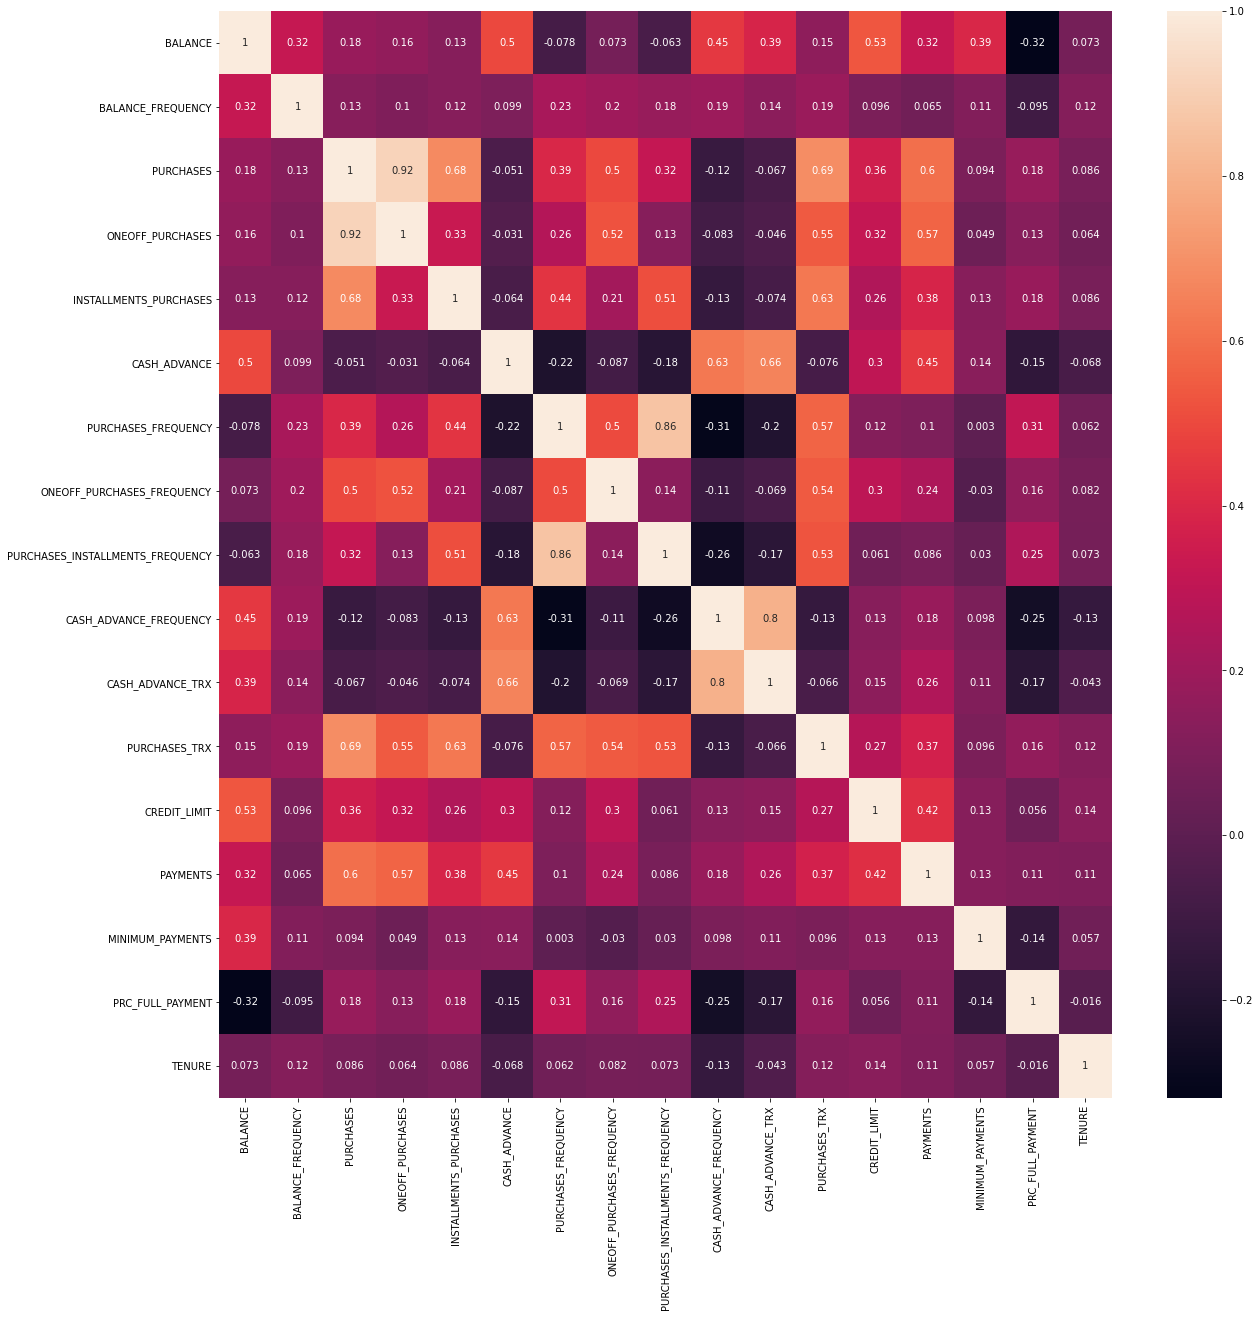

In [20]:
f, ax = plt.subplots(figsize = (20, 20)) 
sns.heatmap(correlations, annot = True) 
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' 


In [21]:
# Let's scale the data first 
scaler = StandardScaler() 
creditcard_df_scaled = scaler.fit_transform(creditcard_df) 

In [22]:
creditcard_df_scaled.shape

(8950, 17)

In [23]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

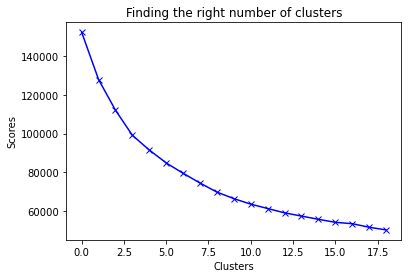

In [24]:
scores_1 = [] 
range_values = range(1, 20) 
for i in range_values: 
    kmeans = KMeans(n_clusters = i) 
    kmeans.fit(creditcard_df_scaled) 
    scores_1.append(kmeans.inertia_) 
plt.plot(scores_1, 'bx-') 
plt.title('Finding the right number of clusters') 
plt.xlabel('Clusters') 
plt.ylabel('Scores')
plt.show() 


In [25]:
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 8. 

kmeans = KMeans(8) 
kmeans.fit(creditcard_df_scaled) 
labels = kmeans.labels_ 

In [26]:
kmeans.cluster_centers_.shape 

(8, 17)

In [27]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns]) 
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.336717,-0.351618,-0.289556,-0.216192,-0.287105,0.068131,-0.204713,-0.289287,-0.225660,0.308086,0.000466,-0.388444,-0.566467,-0.392990,-0.208809,0.013145,-3.202809
1,-0.165621,0.393101,0.473233,0.616950,-0.014643,-0.333808,0.946448,1.881880,0.092228,-0.408068,-0.324367,0.532971,0.381060,0.100656,-0.162835,0.416329,0.262714
2,1.707257,0.392539,-0.214685,-0.154034,-0.224701,2.045349,-0.470500,-0.209611,-0.408051,1.938425,1.962966,-0.262441,1.041672,0.837310,0.521357,-0.390790,0.067782
3,0.934901,0.467049,2.252953,1.707412,2.190297,-0.192704,1.160751,1.548096,1.257221,-0.310075,-0.208712,2.800594,1.235324,1.282259,0.575854,0.273318,0.333736
4,0.024629,0.404291,-0.361623,-0.246729,-0.401656,-0.081229,-0.867983,-0.410029,-0.759594,0.120812,-0.016502,-0.486717,-0.299620,-0.245845,-0.002814,-0.456156,0.271481
5,-0.366314,0.333522,-0.039581,-0.244780,0.355929,-0.364780,0.988573,-0.387904,1.204013,-0.475965,-0.361895,0.185597,-0.261737,-0.219139,-0.046168,0.312466,0.257586
6,-0.701222,-2.139409,-0.310833,-0.235565,-0.302072,-0.322522,-0.555428,-0.443021,-0.439828,-0.521634,-0.376396,-0.419502,-0.177998,-0.202299,-0.257071,0.280448,0.202001
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


In [28]:
# In order to understand what these numbers mean, let's perform inverse transformation 
cluster_centers = scaler.inverse_transform(cluster_centers) 
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns]) 
cluster_centers 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,863.627544,0.793976,384.563451,233.602408,151.442584,1121.745122,0.408189,0.116158,0.274754,0.196795,3.252006,5.054575,2433.410031,595.475430,377.585275,0.157559,7.231140
1,1219.748420,0.970393,2014.274792,1616.448752,397.826040,278.861158,0.870206,0.763859,0.401091,0.053486,1.035262,27.957505,5880.901693,2024.533974,484.726340,0.275484,11.868897
2,5117.986411,0.970260,544.526541,336.772834,207.873743,5268.064382,0.301516,0.139927,0.202267,0.523043,16.644628,8.186541,8284.479983,4157.075557,2079.208200,0.039415,11.608028
3,3510.393168,0.987910,5816.674519,3426.390962,2391.725865,574.762188,0.956216,0.664285,0.864089,0.073095,1.824519,84.322115,8989.062500,5445.158665,2206.210364,0.233656,11.963942
4,1615.737729,0.973044,230.590996,182.916964,47.855240,808.529308,0.141987,0.080138,0.062555,0.159320,3.136214,2.611864,3404.308556,1021.447861,857.649044,0.020297,11.880630
5,802.023378,0.956279,918.639543,186.152834,732.930025,213.911367,0.887113,0.086738,0.842943,0.039899,0.779156,19.323077,3542.144021,1098.758035,756.613473,0.245106,11.862035
6,104.939796,0.370465,339.104814,201.448528,137.907386,302.527006,0.267430,0.070296,0.189639,0.030760,0.680203,4.282572,3846.818481,1147.508187,265.114438,0.235741,11.787648
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [29]:
labels.shape #Labels associated with each data point

(8950,)

In [30]:
labels.max()

7

In [31]:
labels.min()

0

In [32]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([3, 0, 7, ..., 2, 2, 2])

In [33]:
# concatenate the clusters labels to our original dataframe 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1) 
creditcard_df_cluster.head() 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


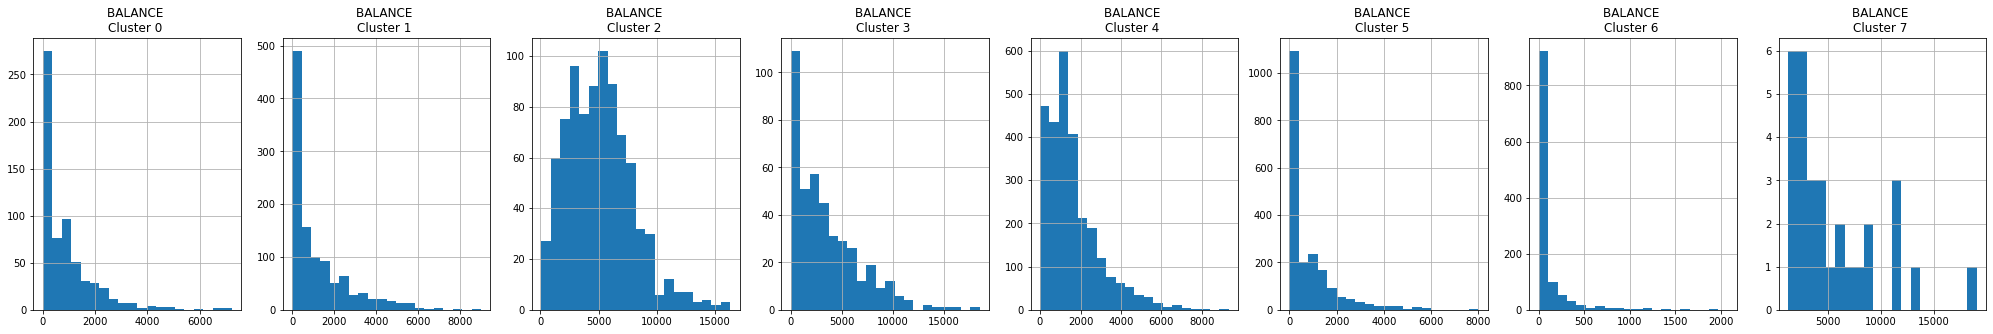

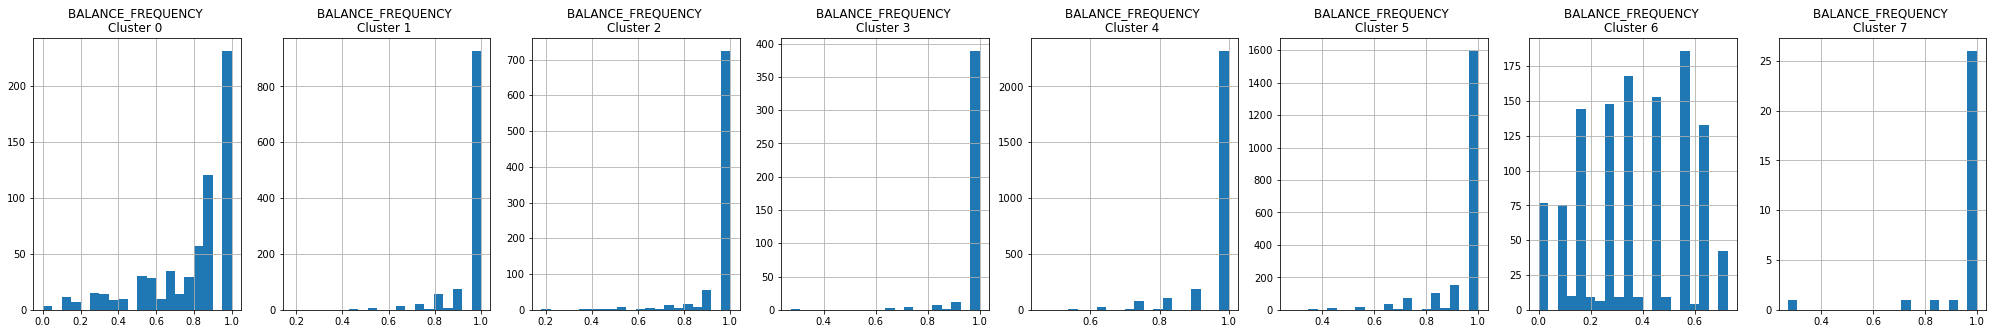

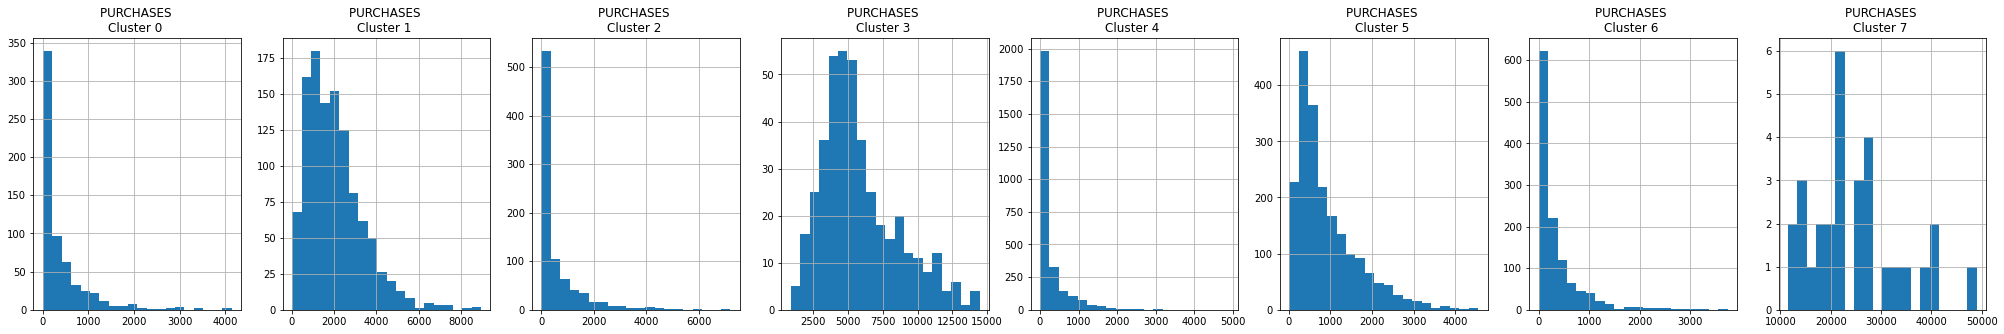

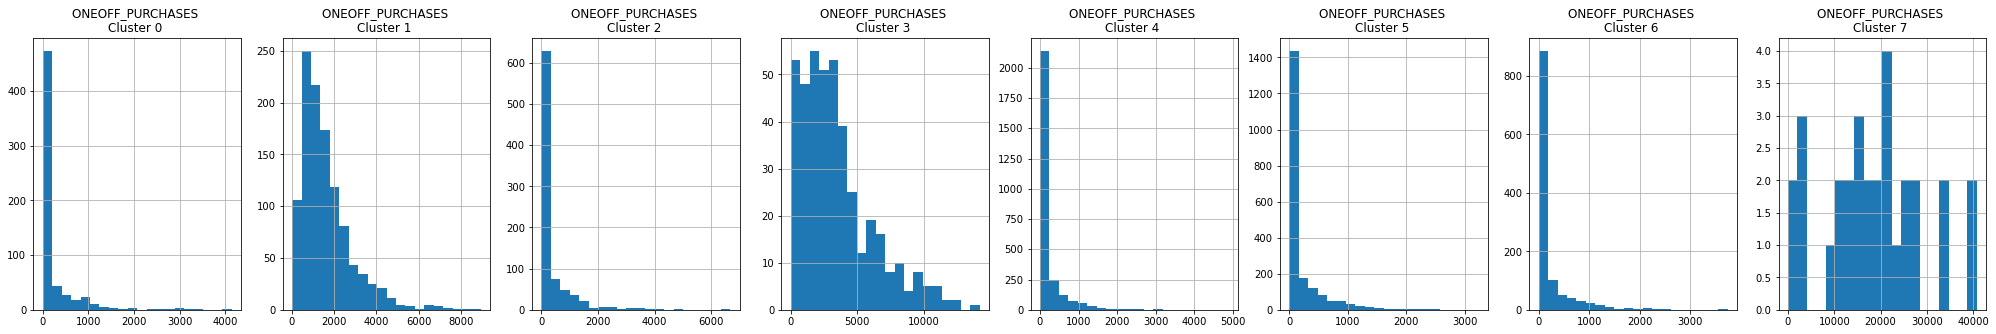

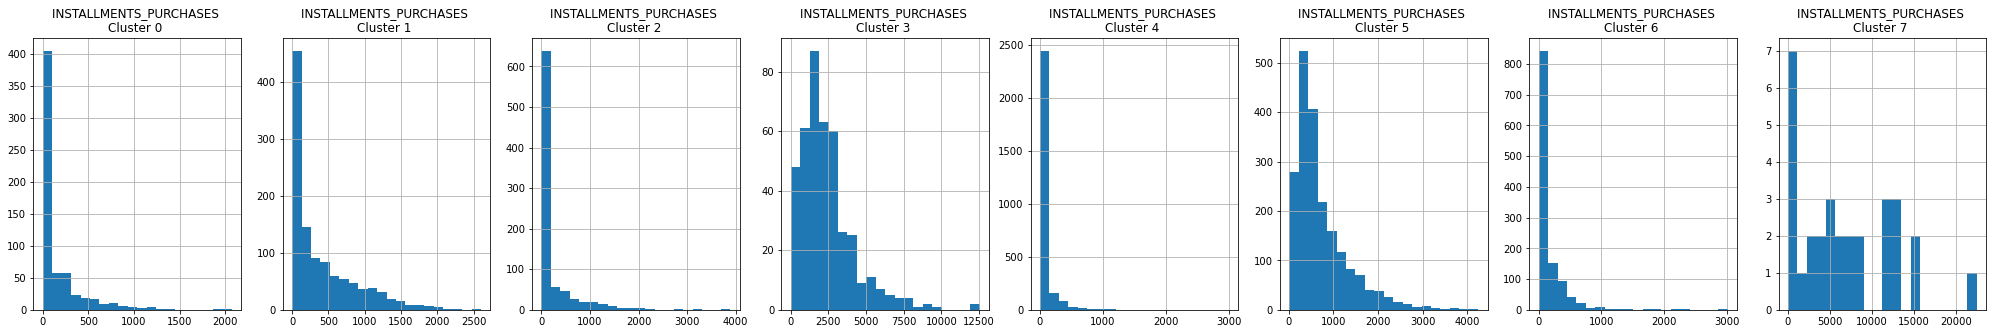

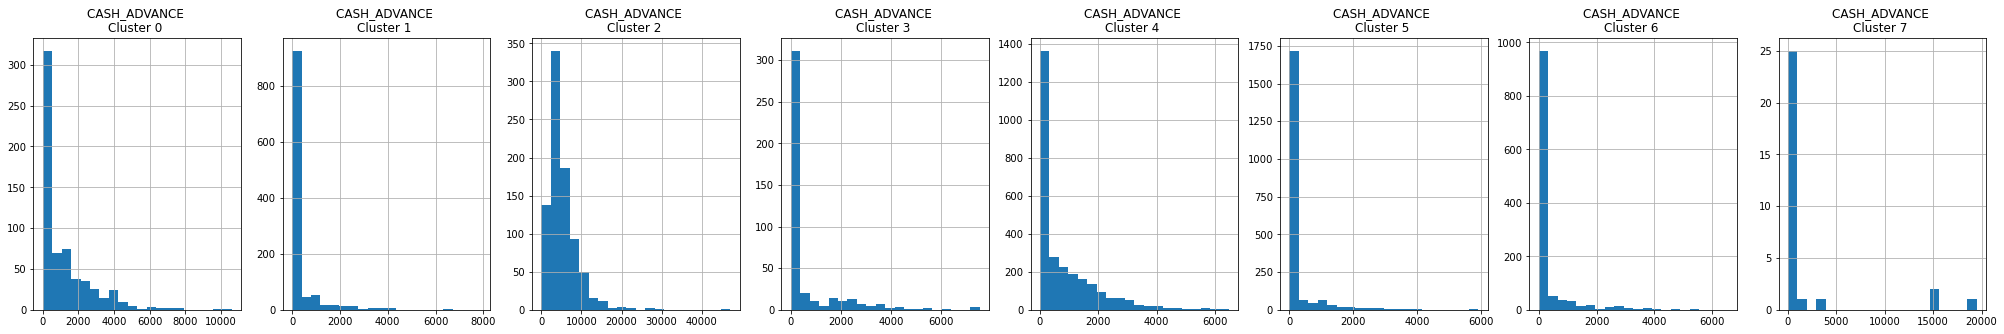

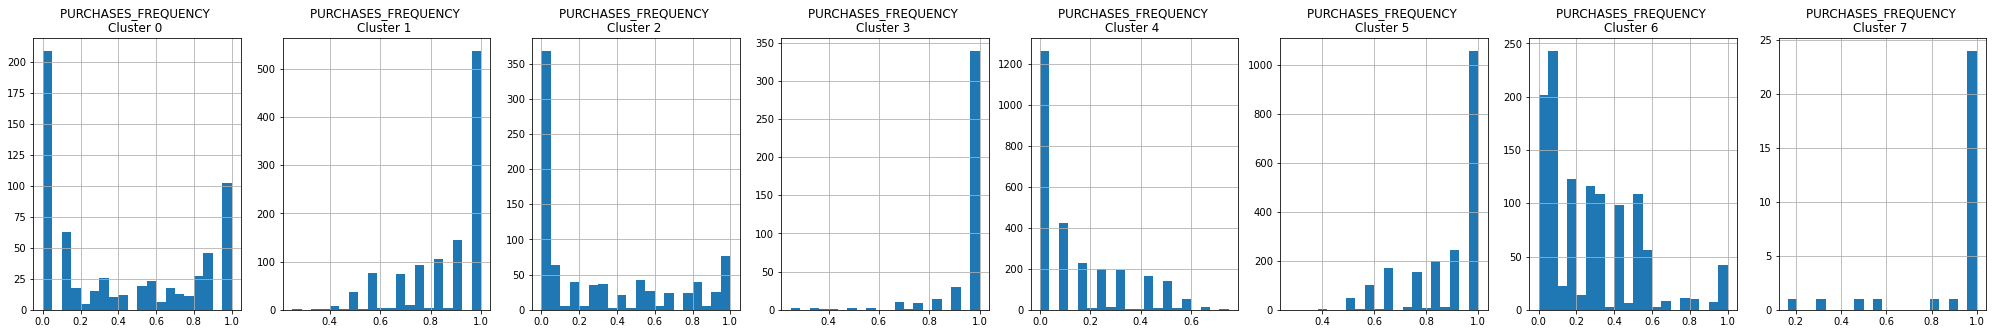

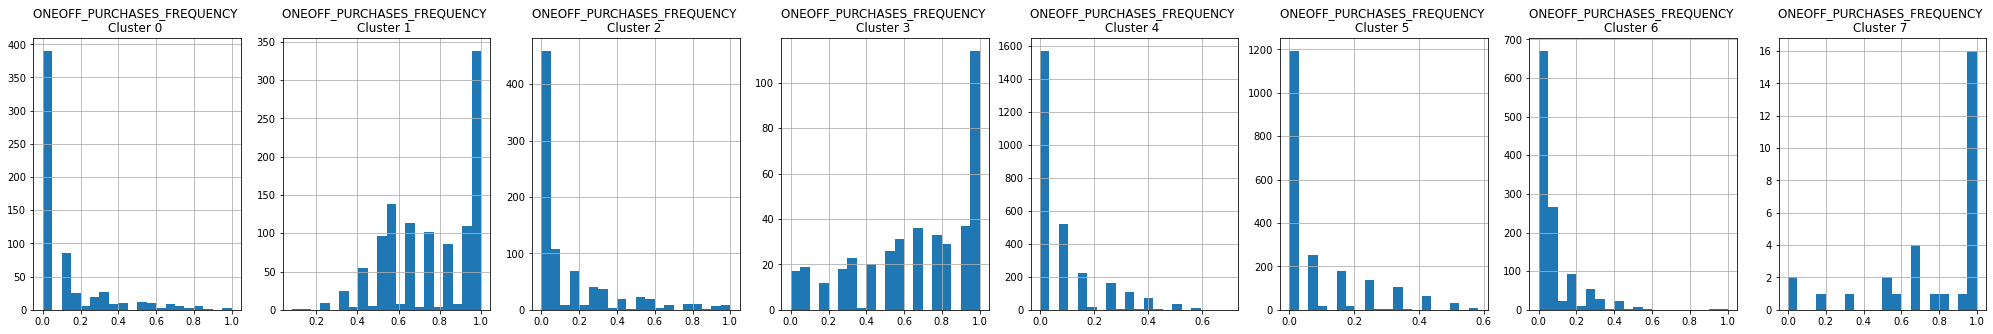

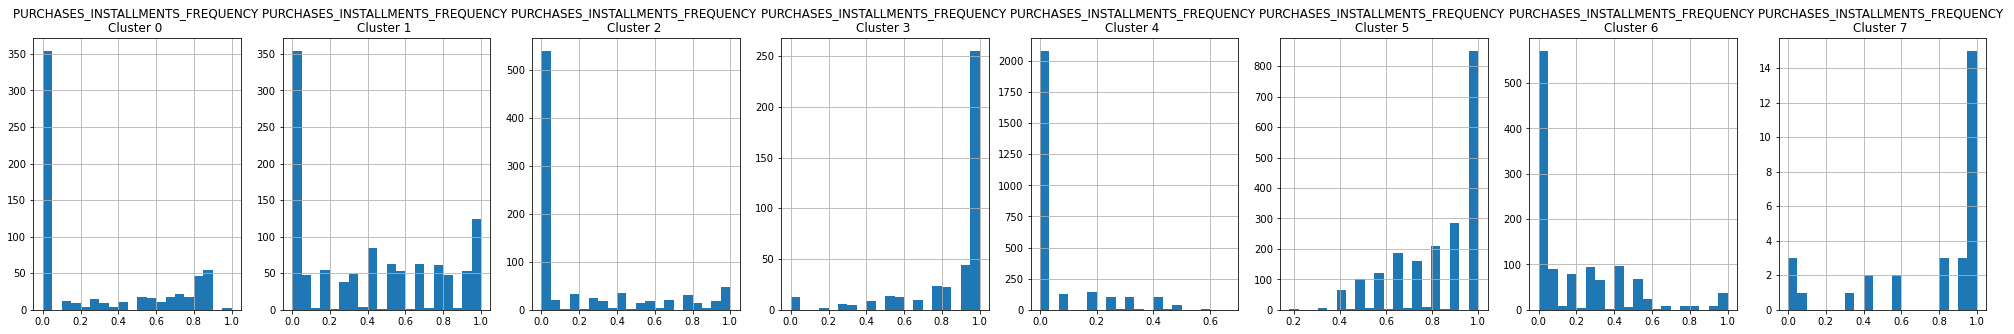

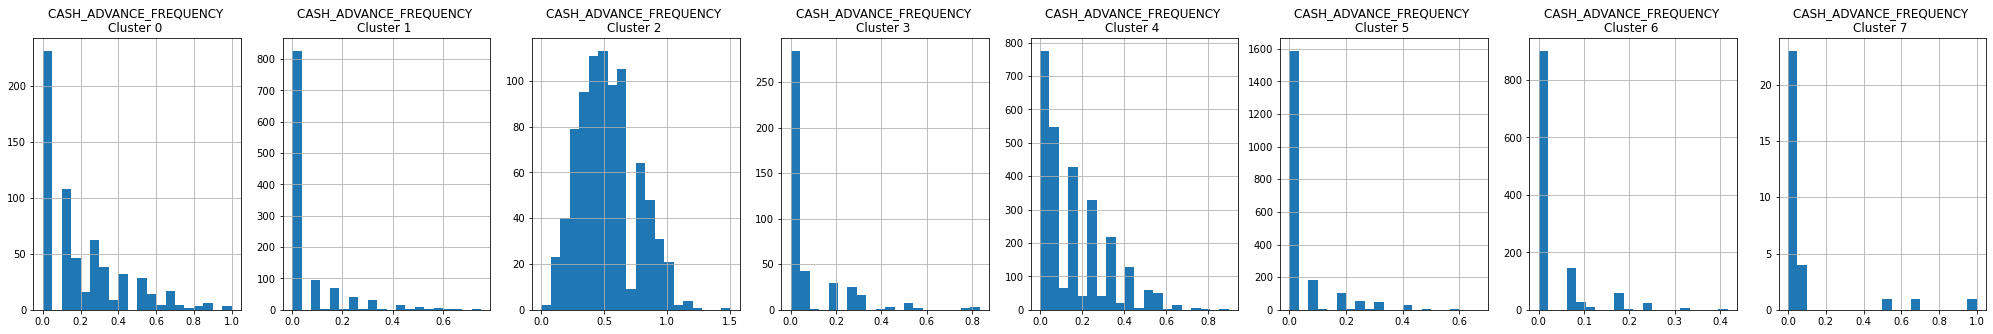

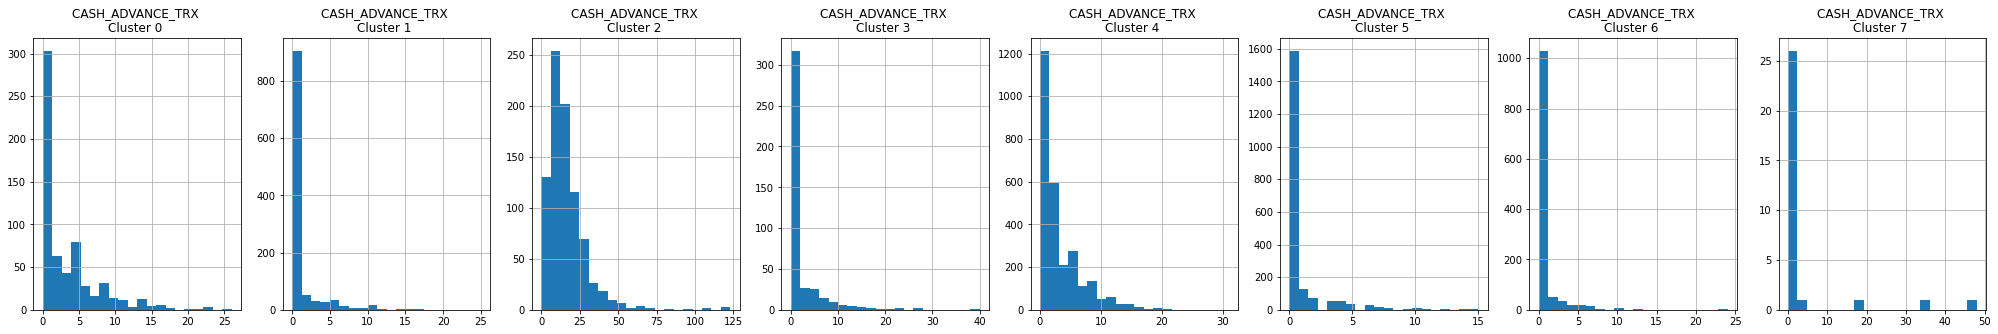

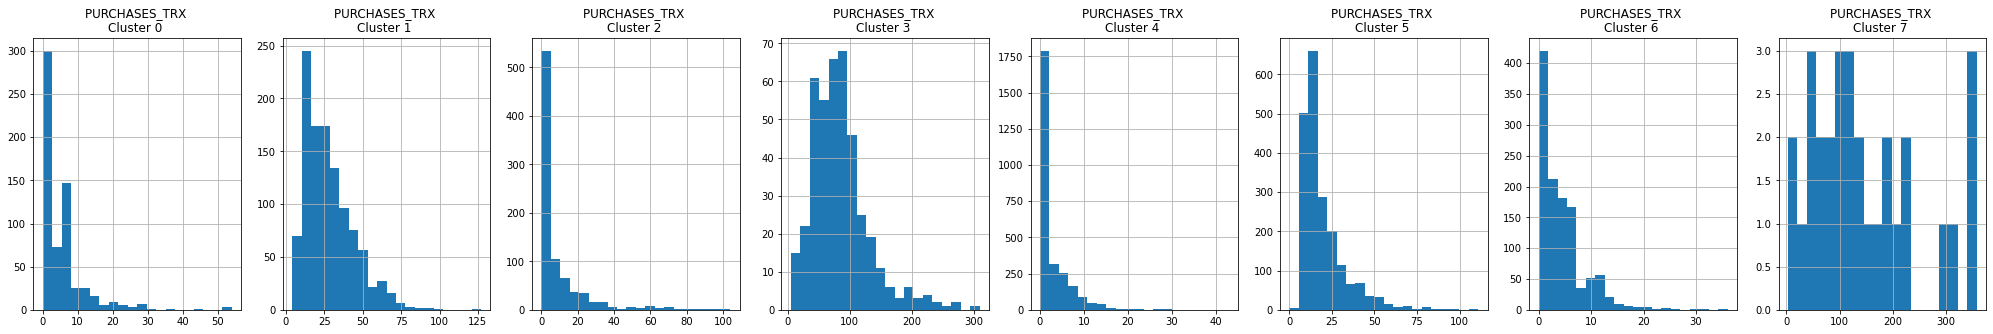

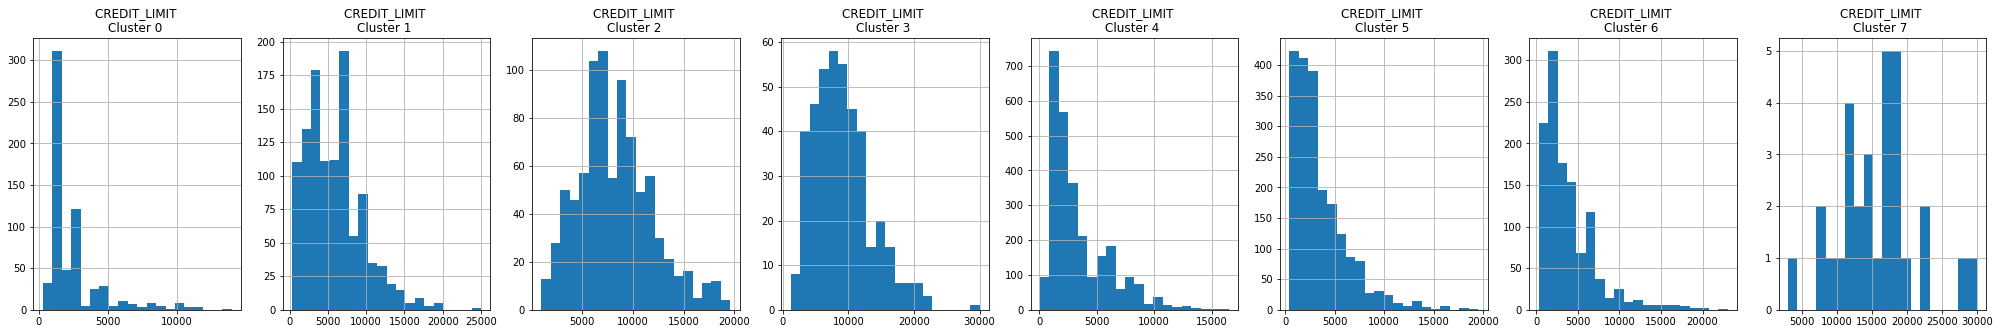

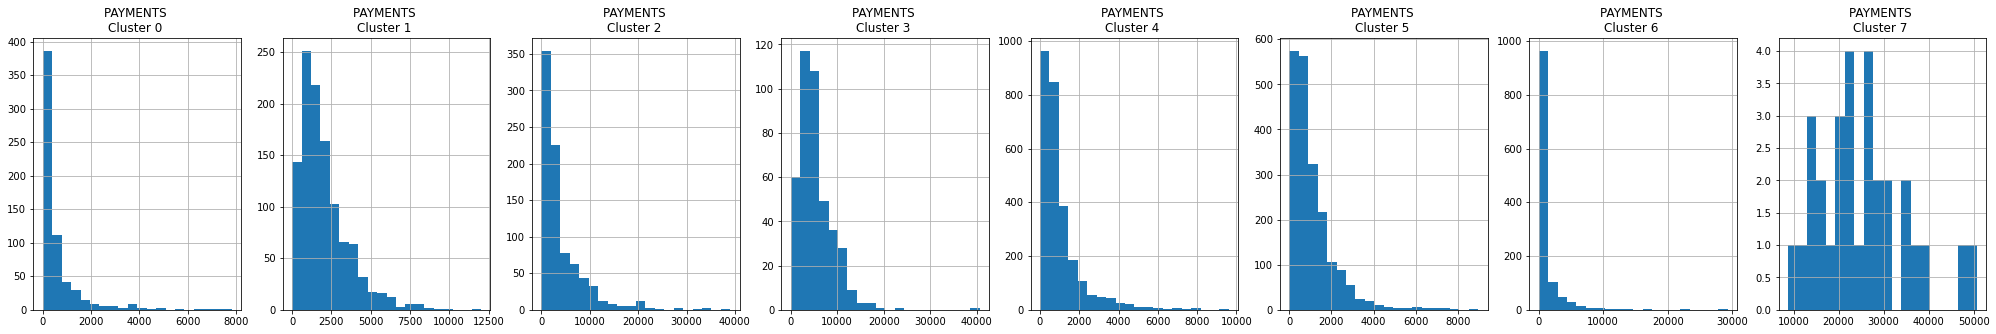

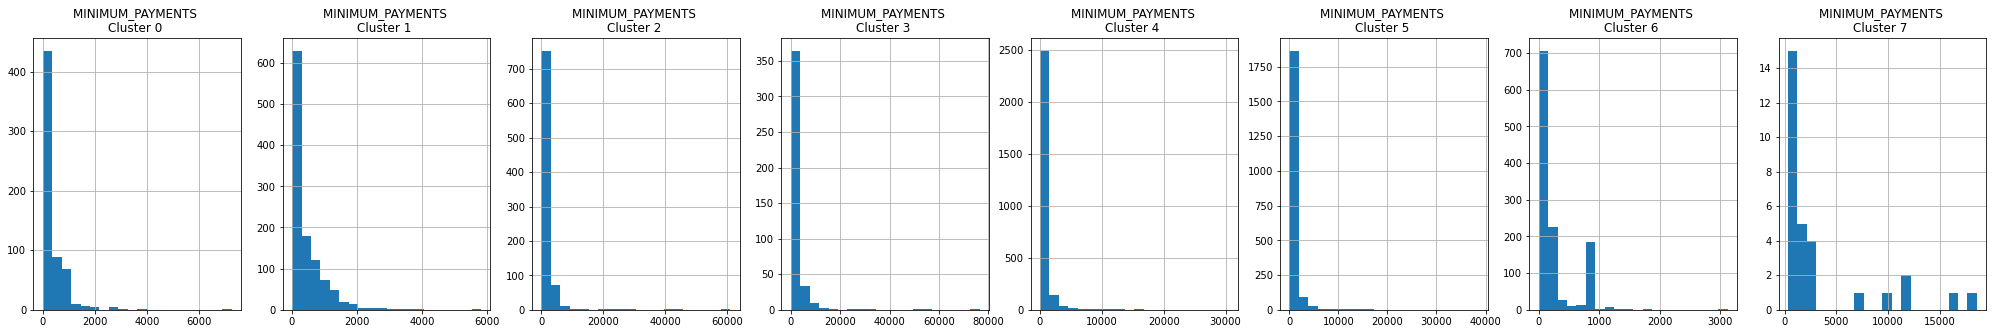

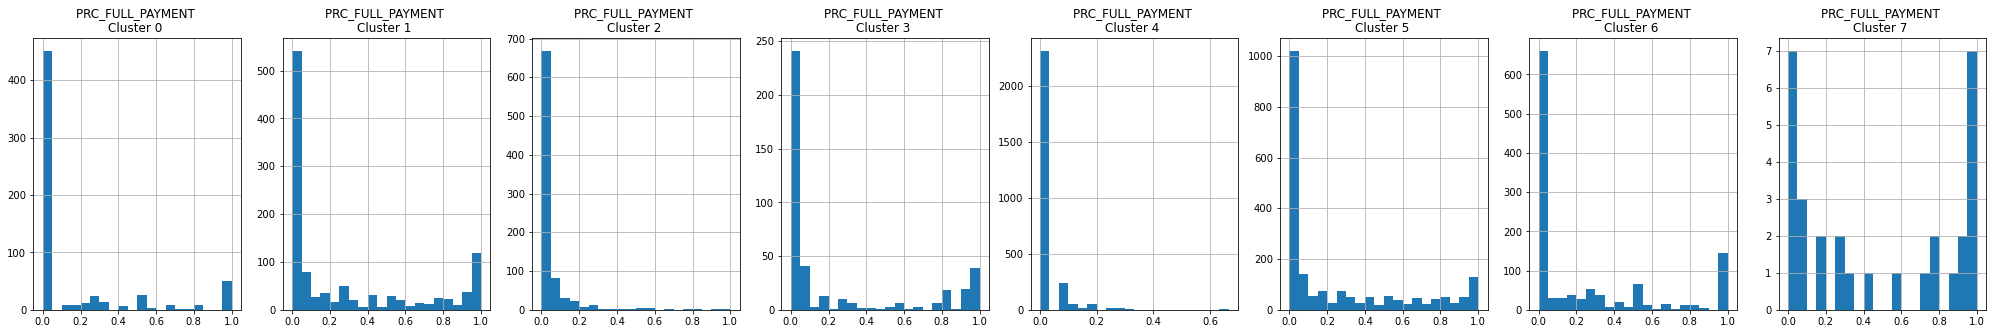

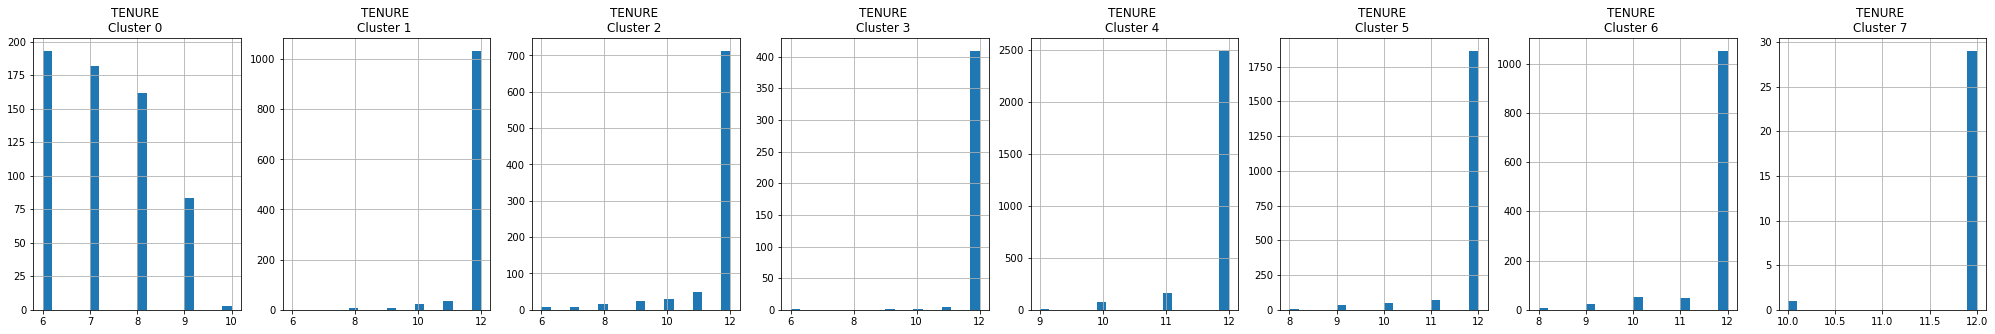

In [34]:
# Plot the histogram of various clusters 
for i in creditcard_df.columns: 
    plt.figure(figsize = (35, 5)) 
    for j in range(8): 
        plt.subplot(1,8,j+1) 
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j] 
        cluster[i].hist(bins = 20) 
        plt.title('{} \nCluster {} '.format(i,j)) 
    plt.show() 


In [37]:
#Obtain the principal components 
pca = PCA(n_components=2) 
principal_comp = pca.fit_transform(creditcard_df_scaled) 
principal_comp 

array([[-1.68221858, -1.07644981],
       [-1.13829194,  2.50647678],
       [ 0.96968326, -0.38351323],
       ...,
       [-0.92620254, -1.81078494],
       [-2.33655346, -0.65796776],
       [-0.55642806, -0.40046852]])

In [38]:
# Create a dataframe with the two components 
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2']) 
pca_df.head() 

,pca1,pca2
0,-1.682219,-1.076450
1,-1.138292,2.506477
2,0.969683,-0.383513
3,-0.873623,0.043163
4,-1.599434,-0.688579


In [39]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1) 
pca_df.head() 

,pca1,pca2,cluster
0,-1.682219,-1.076450,4
1,-1.138292,2.506477,2
2,0.969683,-0.383513,1
3,-0.873623,0.043163,4
4,-1.599434,-0.688579,4


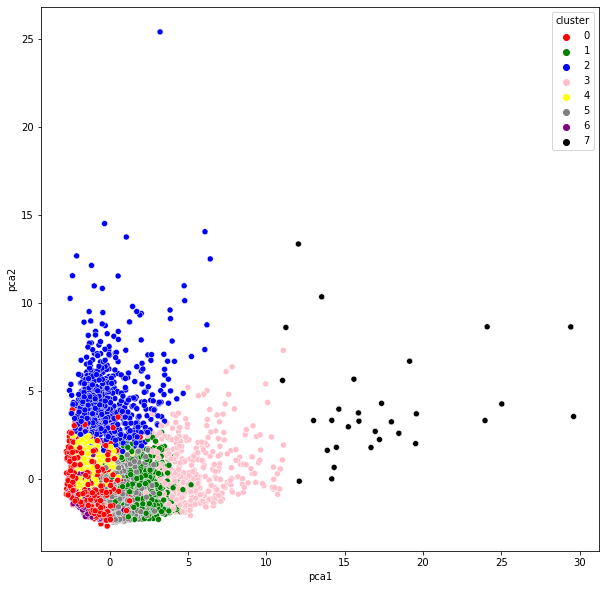

In [40]:
plt.figure(figsize=(10,10)) 
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", 
                     data = pca_df, 
                     palette =['red','green','blue','pink','yellow','gray','purple', 'black']) 
plt.show() 

In [45]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D 
from tensorflow.keras.models import Model, load_model 
from tensorflow.keras.initializers import glorot_uniform 
from tensorflow.keras.optimizers import SGD

In [47]:
encoding_dim = 7 

input_df = Input(shape=(17,)) 

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 
x = Dense(encoding_dim, activation='relu')(input_df) 
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x) 

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x) 


decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x) 

# autoencoder 
autoencoder = Model(input_df, decoded) 
 
#encoder - used for our dimention reduction 
encoder = Model(input_df, encoded) 

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [48]:
creditcard_df_scaled.shape

(8950, 17)

In [49]:
autoencoder.fit(creditcard_df_scaled,creditcard_df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 37ms/step - loss: 0.5228
Epoch 2/25
70/70 [==============================] - 3s 42ms/step - loss: 0.2866: 0s - loss: 0.
Epoch 3/25
70/70 [==============================] - 2s 35ms/step - loss: 0.2304
Epoch 4/25
70/70 [==============================] - 2s 33ms/step - loss: 0.1940
Epoch 5/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1593
Epoch 6/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1453
Epoch 7/25
70/70 [==============================] - 3s 41ms/step - loss: 0.1473
Epoch 8/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1277
Epoch 9/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1148
Epoch 10/25
70/70 [==============================] - 3s 39ms/step - loss: 0.1190
Epoch 11/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1034
Epoch 12/25
70/70 [==============================] - 3s 42ms/step - loss: 0.0982
Epoch 13/25
70/70 [===

In [50]:
autoencoder.save_weights('autoencoder.h5')

In [52]:
pred = encoder.predict(creditcard_df_scaled)

In [53]:
pred.shape

(8950, 10)

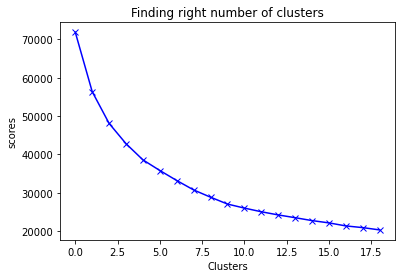

In [54]:
scores_2 = []

range_values = range(1, 20) 

for i in range_values: 
    kmeans = KMeans(n_clusters= i) 
    kmeans.fit(pred) 
    scores_2.append(kmeans.inertia_) 
    
plt.plot(scores_2, 'bx-') 
plt.title('Finding right number of clusters') 
plt.xlabel('Clusters') 
plt.ylabel('scores') 
plt.show()

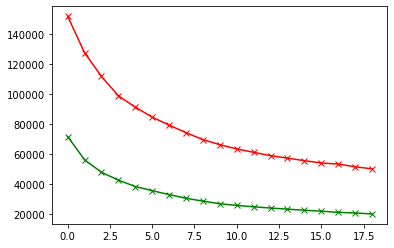

In [55]:
plt.plot(scores_1,'bx-',color='r')
plt.plot(scores_2,'bx-',color='g')

In [58]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [59]:
df_cluster_dr = pd.concat([creditcard_df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [71]:
pca = PCA(n_components=2) 
prin_comp = pca.fit_transform(pred) 
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2']) 
pca_df.head() 

,pca1,pca2
0,-1.597917,-0.307892
1,0.360020,1.305341
2,-0.180040,-0.341856
3,0.284581,0.667186
4,-1.795467,-0.162979


In [73]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1) 
pca_df.head() 

,pca1,pca2,cluster
0,-1.597917,-0.307892,0
1,0.360020,1.305341,3
2,-0.180040,-0.341856,0
3,0.284581,0.667186,0
4,-1.795467,-0.162979,0


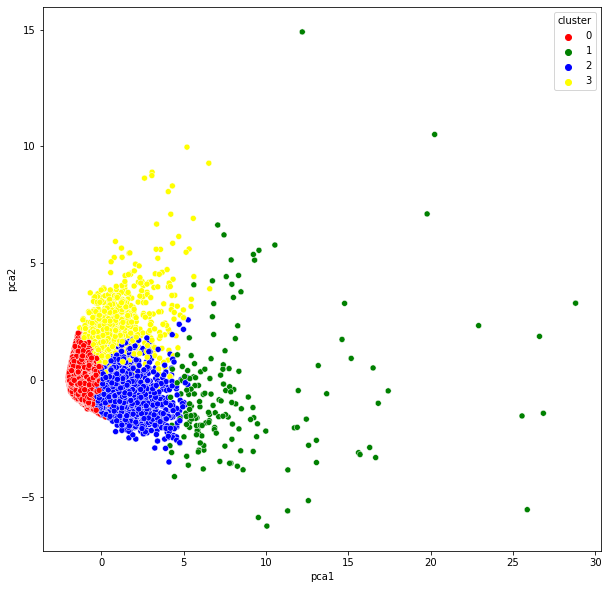

In [74]:
plt.figure(figsize=(10,10)) 
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow']) 
plt.show() 